# Ames Modeling

Load the dataset, begin modeling.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import xgboost as xgb
from itertools import combinations

In [2]:
housing_na = pd.read_csv('data/housing_final_na.csv')
housing_nick = pd.read_csv('data/NH_DF.csv')

#housing.count()
#housing.info()
#housing.describe()

# Feature Selection

In [3]:
numerical_features=['GrLivArea','LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea',
 'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF',
 'GarageYrBlt','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','YrSold', 
 'ScreenPorch','PoolArea','MiscVal','DistanceToISU','YearsSinceRemod','TotalSF'] #'DateSold'
cat_ord_features=['LandSlope','OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual',
 'BsmtCond','HeatingQC','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
 'KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Fireplaces','FireplaceQu','GarageCars',
 'GarageQual','GarageCond','PoolQC','DistanceCategory']
cat_nom_features=['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities',
 'LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle',
 'RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','BsmtExposure','BsmtFinType1',
 'BsmtFinType2','Heating','CentralAir','Electrical','Functional','GarageType','GarageFinish',
 'PavedDrive','Fence','MiscFeature','MoSold','SaleType','SaleCondition']
all_features = numerical_features + cat_ord_features + cat_nom_features
best_features = ['GrLivArea', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
            'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
            'LowQualFinSF', 'BedroomAbvGr'] #top 15 from one of the combinatorics run
print("Number of numerical feat: ",len(numerical_features))
print("Number of ord feat: ",len(cat_ord_features))
print("Number of nom feat: ",len(cat_nom_features))

Number of numerical feat:  26
Number of ord feat:  23
Number of nom feat:  34


# Running the models

# LazyPredict Results

In [4]:
from lazypredict.Supervised import LazyRegressor

features = ['GrLivArea', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
            'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
            'LowQualFinSF', 'BedroomAbvGr']
X = housing_na[features]  # Features
y = housing_na['SalePrice']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% train, 20% test

reg = LazyRegressor(verbose=1, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)


  5%|██                                          | 2/42 [00:00<00:04,  8.14it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.8204411721003655, 'Adjusted R-Squared': 0.8150544072633764, 'RMSE': 33097.006537307854, 'Time taken': 0.13225078582763672}
{'Model': 'BaggingRegressor', 'R-Squared': 0.868068678882781, 'Adjusted R-Squared': 0.8641107392492645, 'RMSE': 28369.99704127657, 'Time taken': 0.11559820175170898}
{'Model': 'BayesianRidge', 'R-Squared': 0.8652794282304375, 'Adjusted R-Squared': 0.8612378110773506, 'RMSE': 28668.32330225615, 'Time taken': 0.020534753799438477}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.7352380317019209, 'Adjusted R-Squared': 0.7272951726529786, 'RMSE': 40189.549251872566, 'Time taken': 0.023481369018554688}
{'Model': 'DummyRegressor', 'R-Squared': -0.004594622264182835, 'Adjusted R-Squared': -0.034732460932108244, 'RMSE': 78285.39718401998, 'Time taken': 0.004890918731689453}
{'Model': 'ElasticNet', 'R-Squared': 0.8200887445795295, 'Adjusted R-Squared': 0.8146914069169153, 'RMSE': 33129.47104548229, 'Time taken': 0.006278991699

 17%|███████▎                                    | 7/42 [00:00<00:01, 23.54it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.08012820987117275, 'Adjusted R-Squared': 0.05253205616730794, 'RMSE': 74911.58482385911, 'Time taken': 0.06089615821838379}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.7786419905115494, 'Adjusted R-Squared': 0.7720012502268958, 'RMSE': 36747.936331735116, 'Time taken': 0.012374639511108398}
{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.8955917445126147, 'Adjusted R-Squared': 0.8924594968479931, 'RMSE': 25237.873227966324, 'Time taken': 0.4803428649902344}


 24%|██████████▏                                | 10/42 [00:01<00:04,  7.22it/s]

{'Model': 'GammaRegressor', 'R-Squared': 0.8075500116728933, 'Adjusted R-Squared': 0.8017765120230801, 'RMSE': 34264.49057645015, 'Time taken': 0.33784031867980957}
{'Model': 'GaussianProcessRegressor', 'R-Squared': -0.37399060064214473, 'Adjusted R-Squared': -0.4152103186614091, 'RMSE': 91553.97729701397, 'Time taken': 0.27338385581970215}


 33%|██████████████▎                            | 14/42 [00:02<00:04,  6.22it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9030253005580384, 'Adjusted R-Squared': 0.9001160595747796, 'RMSE': 24322.8552897652, 'Time taken': 0.3517744541168213}
{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.895799911607881, 'Adjusted R-Squared': 0.8926739089561174, 'RMSE': 25212.701290997593, 'Time taken': 0.15629792213439941}
{'Model': 'HuberRegressor', 'R-Squared': 0.8552113479259001, 'Adjusted R-Squared': 0.8508676883636772, 'RMSE': 29720.259515699614, 'Time taken': 0.03168368339538574}


 38%|████████████████▍                          | 16/42 [00:02<00:03,  7.28it/s]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.8554225881433632, 'Adjusted R-Squared': 0.8510852657876642, 'RMSE': 29698.571332483658, 'Time taken': 0.028003931045532227}
{'Model': 'KernelRidge', 'R-Squared': -4.265642915141499, 'Adjusted R-Squared': -4.423612202595744, 'RMSE': 179230.1371293558, 'Time taken': 0.13073158264160156}
{'Model': 'Lars', 'R-Squared': 0.865461603305608, 'Adjusted R-Squared': 0.8614254514047762, 'RMSE': 28648.933462032586, 'Time taken': 0.01328277587890625}
{'Model': 'LarsCV', 'R-Squared': 0.865461603305608, 'Adjusted R-Squared': 0.8614254514047762, 'RMSE': 28648.933462032586, 'Time taken': 0.01945781707763672}
{'Model': 'Lasso', 'R-Squared': 0.8654588240483535, 'Adjusted R-Squared': 0.8614225887698042, 'RMSE': 28649.2293714046, 'Time taken': 0.0071871280670166016}


 48%|████████████████████▍                      | 20/42 [00:02<00:01, 11.57it/s]

{'Model': 'LassoCV', 'R-Squared': 0.8652105831304475, 'Adjusted R-Squared': 0.861166900624361, 'RMSE': 28675.647430544042, 'Time taken': 0.0595400333404541}
{'Model': 'LassoLars', 'R-Squared': 0.8654574069028226, 'Adjusted R-Squared': 0.8614211291099072, 'RMSE': 28649.38025465713, 'Time taken': 0.008432388305664062}
{'Model': 'LassoLarsCV', 'R-Squared': 0.865461603305608, 'Adjusted R-Squared': 0.8614254514047762, 'RMSE': 28648.933462032586, 'Time taken': 0.021676301956176758}
{'Model': 'LassoLarsIC', 'R-Squared': 0.865461603305608, 'Adjusted R-Squared': 0.8614254514047762, 'RMSE': 28648.933462032586, 'Time taken': 0.01331949234008789}
{'Model': 'LinearRegression', 'R-Squared': 0.8648539663146706, 'Adjusted R-Squared': 0.8607995853041107, 'RMSE': 28713.55642698685, 'Time taken': 0.009623050689697266}
{'Model': 'LinearSVR', 'R-Squared': -5.324290614214017, 'Adjusted R-Squared': -5.514019332640437, 'RMSE': 196422.5044133675, 'Time taken': 0.008313179016113281}


 67%|████████████████████████████▋              | 28/42 [00:03<00:01,  9.75it/s]

{'Model': 'MLPRegressor', 'R-Squared': -5.2326584223732695, 'Adjusted R-Squared': -5.419638175044468, 'RMSE': 194994.33661340296, 'Time taken': 0.7608675956726074}
{'Model': 'NuSVR', 'R-Squared': -0.0306303578030378, 'Adjusted R-Squared': -0.061549268537129054, 'RMSE': 79293.35616967897, 'Time taken': 0.1224973201751709}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.6201582397185916, 'Adjusted R-Squared': 0.6087629869101494, 'RMSE': 48137.85005332148, 'Time taken': 0.0061266422271728516}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.8297349237551761, 'Adjusted R-Squared': 0.8246269714678314, 'RMSE': 32229.095952513613, 'Time taken': 0.014094829559326172}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.8511391886154488, 'Adjusted R-Squared': 0.8466733642739123, 'RMSE': 30135.300449601295, 'Time taken': 0.0410158634185791}


 74%|███████████████████████████████▋           | 31/42 [00:04<00:01,  6.47it/s]

{'Model': 'PoissonRegressor', 'R-Squared': 0.9091646135012315, 'Adjusted R-Squared': 0.9064395519062685, 'RMSE': 23540.347471941794, 'Time taken': 0.7918415069580078}
QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.
{'Model': 'RANSACRegressor', 'R-Squared': 0.8457644971252284, 'Adjusted R-Squared': 0.8411374320389853, 'RMSE': 30674.501366759432, 'Time taken': 0.06555438041687012}


 90%|██████████████████████████████████████▉    | 38/42 [00:05<00:00,  6.49it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.8965712156801915, 'Adjusted R-Squared': 0.8934683521505973, 'RMSE': 25119.21394356461, 'Time taken': 0.9863998889923096}
{'Model': 'Ridge', 'R-Squared': 0.8654261091219766, 'Adjusted R-Squared': 0.8613888923956359, 'RMSE': 28652.7123217142, 'Time taken': 0.007214546203613281}
{'Model': 'RidgeCV', 'R-Squared': 0.8651014802989498, 'Adjusted R-Squared': 0.8610545247079183, 'RMSE': 28687.250572550878, 'Time taken': 0.008709907531738281}
{'Model': 'SGDRegressor', 'R-Squared': 0.8549913248691959, 'Adjusted R-Squared': 0.8506410646152718, 'RMSE': 29742.832624474206, 'Time taken': 0.009090662002563477}
{'Model': 'SVR', 'R-Squared': -0.0865111145014501, 'Adjusted R-Squared': -0.11910644793649361, 'RMSE': 81414.62399750759, 'Time taken': 0.17154669761657715}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.8648539663146706, 'Adjusted R-Squared': 0.8607995853041107, 'RMSE': 28713.55642698685, 'Time taken': 0.012918949127197266}


100%|███████████████████████████████████████████| 42/42 [00:06<00:00,  6.81it/s]

{'Model': 'TweedieRegressor', 'R-Squared': 0.7756747727673801, 'Adjusted R-Squared': 0.7689450159504014, 'RMSE': 36993.41231652724, 'Time taken': 0.6509044170379639}
{'Model': 'XGBRegressor', 'R-Squared': 0.8956136499372515, 'Adjusted R-Squared': 0.892482059435369, 'RMSE': 25235.225566974397, 'Time taken': 0.10083436965942383}
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000112 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1934
[LightGBM] [Info] Number of data points in the train set: 2063, number of used features: 15
[LightGBM] [Info] Start training from score 176994.167717
{'Model': 'LGBMRegressor', 'R-Squared': 0.9018723827187081, 'Adjusted R-Squared': 0.8989285542002693, 'RMSE': 24467.013498966535, 'Time taken': 0.07429671287536621}
                               Adjusted R-Squared  R-Squared      RMSE  \
Model                                                                    
PoissonRegre

# RandomForestRegressor

In [5]:
X = housing_na[all_features] # Features
y = housing_na['SalePrice']  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, cat_nom_features)])

# Append classifier to preprocessing pipeline.
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestRegressor(n_estimators=100, random_state=42))])

# Preprocessing of training data and train model
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
print(f'R^2 Score: {r2_score(y_test, y_pred)}')
print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')


R^2 Score: 0.8864118923486186
RMSE: 26323.993022727576


In [6]:
# Compute the R^2 scores
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')

# Print R^2 score for each fold
for i, score in enumerate(scores, 1):
    print(f"R^2 Score for fold {i}: {score:.4f}")

# Print average R^2 score
print(f"\nAverage R^2 Score across the 5 folds: {scores.mean():.4f}")


R^2 Score for fold 1: 0.8310
R^2 Score for fold 2: 0.8828
R^2 Score for fold 3: 0.8502
R^2 Score for fold 4: 0.8748
R^2 Score for fold 5: 0.8523

Average R^2 Score across the 5 folds: 0.8582


In [7]:
# Convert categorical columns to one-hot encoding
X_train = pd.get_dummies(X_train)

# Handle missing data by filling with the mean value of each column
X_train.fillna(X_train.mean(), inplace=True)

# Now, try training the model again
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# To sort features by importance
sorted_idx = importances.argsort()
for idx in sorted_idx:
    print(f"{X_train.columns[idx]}: {importances[idx]}")


MiscFeature_TenC: 0.0
Condition2_Artery: 9.294415070962265e-10
Exterior1st_ImStucc: 1.4835509560285517e-09
MSZoning_I (all): 3.2395205538657427e-09
Exterior1st_AsphShn: 5.18171641155553e-09
Exterior1st_PreCast: 5.643280497335994e-09
SaleCondition_Alloca: 6.236190525722215e-09
Functional_Sal: 1.0199554955841963e-08
Exterior2nd_AsphShn: 2.9393445595916623e-08
RoofMatl_Metal: 3.045007574219109e-08
SaleCondition_AdjLand: 5.543733708929058e-08
Condition2_RRNn: 1.0975563115355044e-07
Heating_Grav: 1.1694682592677292e-07
Exterior1st_CBlock: 1.5615421486430574e-07
Condition1_RRNe: 1.8724564616523886e-07
RoofMatl_Roll: 3.004631763435668e-07
Condition2_PosA: 3.092099765642183e-07
SaleType_VWD: 3.68826385004499e-07
Exterior2nd_CBlock: 4.650351234472378e-07
Fence_MnWw: 4.943861205651911e-07
Utilities_NoSewr: 5.517849988151421e-07
Street_Pave: 7.266116463779013e-07
GarageType_CarPort: 1.051558170201836e-06
Exterior2nd_Stone: 1.0634074423782391e-06
Condition2_RRAn: 1.0883438499571902e-06
Street_Grvl

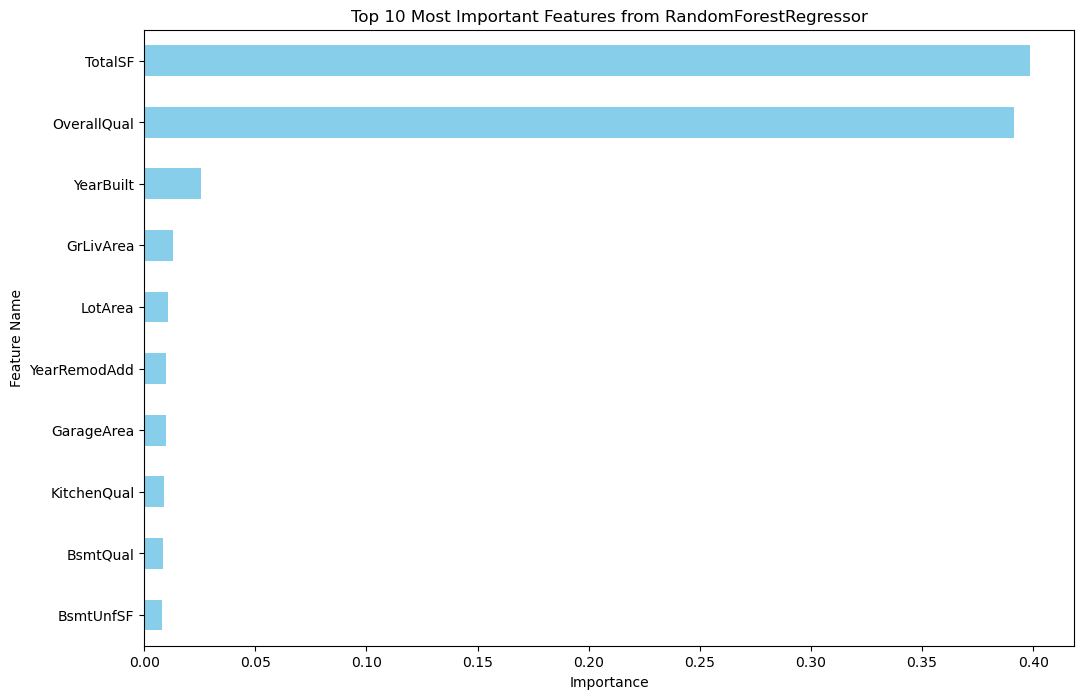

In [8]:
# Map importances to the column names
feature_importances = pd.Series(importances, index=X_train.columns)
top_10 = feature_importances.sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 8))
top_10.plot(kind='barh', color='skyblue')
plt.title('Top 10 Most Important Features from RandomForestRegressor')
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.gca().invert_yaxis()  # to have the most important feature at the top
plt.show()


# XGBoost Regressor

In [9]:
# Define your feature matrix and target variable, with dummy variables for categorical columns
X = pd.get_dummies(housing_na[all_features], columns=cat_nom_features, drop_first=True)
y = housing_na['SalePrice']

# Initialize the KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store RMSE and R2 scores for each fold
rmse_scores = []
r2_scores = []

# Perform k-fold cross-validation
fold = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Create an XGBoost regressor model
    model = xgb.XGBRegressor(objective="reg:squarederror")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate RMSE for this fold
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)
    
    # Calculate R2 for this fold
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)
    
    # Display RMSE and R2 for this fold
    print(f"Fold {fold}: RMSE = {rmse:.4f}, R2 = {r2:.4f}")
    fold += 1

# Calculate and print the mean RMSE and R2 across all folds
mean_rmse = np.mean(rmse_scores)
mean_r2 = np.mean(r2_scores)
print(f"Mean RMSE: {mean_rmse:.4f}")
print(f"Mean R2: {mean_r2:.4f}")


Fold 1: RMSE = 22733.5276, R2 = 0.9153
Fold 2: RMSE = 30030.8191, R2 = 0.8556
Fold 3: RMSE = 26045.9317, R2 = 0.8940
Fold 4: RMSE = 21878.0690, R2 = 0.9077
Fold 5: RMSE = 19761.0580, R2 = 0.9053
Mean RMSE: 24089.8811
Mean R2: 0.8956


In [10]:
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5],
    'gamma': [0.0, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'lambda': [0, 0.5, 1],
    'alpha': [0, 0.5, 1]
}

xgb_model = xgb.XGBRegressor(objective ='reg:squarederror')
grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring='r2', verbose=1, n_jobs=-1)
grid_search.fit(X, y)
print(f"Best hyperparameters: {grid_search.best_params_}")

Fitting 3 folds for each of 2916 candidates, totalling 8748 fits
Best hyperparameters: {'alpha': 1, 'colsample_bytree': 0.8, 'gamma': 0.0, 'lambda': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.8}


In [11]:
best_params = {
    'alpha': 1, 
    'colsample_bytree': 0.8, 
    'gamma': 0.0, 
    'lambda': 0.5, 
    'max_depth': 3, 
    'min_child_weight': 1, 
    'subsample': 0.8,
    'objective': 'reg:squarederror'  # This is the default for regression tasks in XGBoost
}

#grid_search.best_params_
model = xgb.XGBRegressor(**grid_search.best_params_)

kf = KFold(n_splits=5, shuffle=True, random_state=0)
mse_scores = []
r2_scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse_scores.append(mean_squared_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))
    

print("MSE for each fold:", mse_scores)
print("R^2 for each fold:", r2_scores)
print("Average MSE:", sum(mse_scores) / len(mse_scores))
print("Average R^2:", sum(r2_scores) / len(r2_scores))



MSE for each fold: [426452987.5767549, 838501370.6313115, 350728204.3105679, 370588147.5562529, 626044963.9505055]
R^2 for each fold: [0.9302332737122428, 0.8176371247184612, 0.9417214175416545, 0.9238547250735907, 0.9042583741434815]
Average MSE: 522463134.8050785
Average R^2: 0.903540983037886


In [12]:
# Create an XGBoost regressor model (if you haven't already)
model = xgb.XGBRegressor(objective="reg:squarederror")
model.fit(X, y)
feature_importances = model.feature_importances_

# Create a DataFrame to display feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df.head(25))


                  Feature  Importance
27            OverallQual        0.38
25                TotalSF        0.14
44             GarageCars        0.05
202          CentralAir_Y        0.04
69            MSZoning_RM        0.03
40            KitchenQual        0.02
29              ExterQual        0.02
165   Exterior2nd_CmentBd        0.02
31               BsmtQual        0.02
214    GarageType_BuiltIn        0.02
39           KitchenAbvGr        0.01
42             Fireplaces        0.01
88   Neighborhood_Crawfor        0.01
3               YearBuilt        0.01
219          PavedDrive_P        0.01
68            MSZoning_RL        0.01
46             GarageCond        0.01
12           LowQualFinSF        0.01
34           BsmtFullBath        0.01
246          SaleType_WD         0.01
43            FireplaceQu        0.01
243          SaleType_New        0.01
4            YearRemodAdd        0.01
28            OverallCond        0.00
149   Exterior1st_BrkFace        0.00


# Gradient Boosting Regressor

## First run with no tuning

In [13]:
X = housing_nick[all_features]
y = housing_nick['SalePrice']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, cat_nom_features)])

# Append classifier to preprocessing pipeline.
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', GradientBoostingRegressor(random_state=42))])

# Preprocessing of training data and train model
pipeline.fit(X_train, y_train)
# Predict on test data
y_pred = pipeline.predict(X_test)
   
# Calculate RMSE for this fold
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

#print(r2)
# Compute the R^2 scores
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
# Print average R^2 score
print(f"\nAverage R^2 Score across the 5 folds: {scores.mean():.4f}")

KeyError: "['YearBuilt', 'YearsSinceRemod', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'DistanceCategory', 'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'] not in index"

In [207]:
param_grid = {
    'max_depth': [3, 5, 6, 7],
    'min_weight_fraction_leaf': [0, 0.25, 0.5],
    'n_estimators': [100, 200, 300, 400, 500, 600],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'learning_rate': [0.1, 0.05, 0.01, 0.001],
    'subsample': [0.7, 0.8, 0.9],
    'alpha': [0, 0.5, 0.9]
}
#['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 
# 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 
# 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 
# 'tol', 'validation_fraction', 'verbose', 'warm_start']

# Define your feature matrix and target variable, with dummy variables for categorical columns
X = pd.get_dummies(housing[all_features], columns=cat_nom_features, drop_first=False)
y = housing['SalePrice']

model = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='r2', verbose=1, n_jobs=-1)
grid_search.fit(X, y)
print(f"Best hyperparameters: {grid_search.best_params_}")



Fitting 3 folds for each of 23328 candidates, totalling 69984 fits
Best hyperparameters: {'alpha': 0.5, 'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0, 'n_estimators': 600, 'subsample': 0.7}


In [254]:
#X.to_csv('data/CharlotteX.csv', index=False)
#y.to_csv('data/y.csv', index=False)

In [257]:
#My best hyperparameters: {'alpha': 0.5, 'max_depth': 5, 'min_weight_fraction_leaf': 0, 'subsample': 0.8}
#0.9219231402135216
#Best hyperparameters: {'alpha': 0.5, 'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 1, 
#'min_samples_split': 10, 'min_weight_fraction_leaf': 0, 'n_estimators': 600, 'subsample': 0.7}
#0.9279361418087255
new_param = {
    'max_depth': 3,
    'min_weight_fraction_leaf': 0,
    'n_estimators': 4000,
    'min_samples_split': 10,
    'min_samples_leaf': 1,
    'learning_rate': 0.05,
    'subsample': 0.7,
    'alpha': 0.5
}

nick_param = {
    'max_depth': 3,
    'n_estimators': 6000,
    'min_samples_split': 5,
    'learning_rate': 0.008,
    'subsample': 0.3
}
#Nicks 1st: n_estimators=10100, max_depth=4, learning_rate=0.01,min_samples_leaf=1, subsample=0.5, random_state=42
#Nicks best: learning_rate=0.008, max_depth=3, min_samples_split=5, n_estimators=6000, subsample=0.3

# Define your feature matrix and target variable, with dummy variables for categorical columns
X = housing2.drop('SalePrice', axis=1)
y = housing2['SalePrice']

#X = pd.get_dummies(housing[all_features], columns=cat_nom_features, drop_first=True)
#y = housing['SalePrice']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#model = GradientBoostingRegressor(**grid_search.best_params_)
model = GradientBoostingRegressor(**nick_param)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(r2)
# Compute the R^2 scores
scores = cross_val_score(GradientBoostingRegressor(**nick_param, random_state=42), X_train, y_train, cv=5, scoring='r2')
# Print average R^2 score
print(f"\nAverage R^2 Score across the 5 folds: {scores.mean():.4f}")

0.9482111693987879

Average R^2 Score across the 5 folds: 0.9410


In [258]:
feature_importances = model.feature_importances_

# Create a DataFrame to display feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df.head(25))

                  Feature  Importance
36                TotalSF        0.35
3             OverallQual        0.26
35                    Age        0.03
0               GrLivArea        0.02
7              BsmtFinSF1        0.02
2                 LotArea        0.02
6              MasVnrArea        0.02
45          KitchenQual_n        0.02
38             BsmtQual_n        0.02
19             GarageArea        0.02
5            YearRemodAdd        0.02
18             GarageCars        0.01
9               BsmtUnfSF        0.01
11               1stFlrSF        0.01
41          FireplaceQu_n        0.01
4             OverallCond        0.01
10            TotalBsmtSF        0.01
240  SaleCondition_Family        0.01
1             LotFrontage        0.01
40            ExterQual_n        0.01
29               latitude        0.01
46         BsmtExposure_n        0.01
12               2ndFlrSF        0.01
24            ScreenPorch        0.00
50         GarageFinish_n        0.00


Checklist

    which missing values to fill, which to leave
    how to fill missing
    how to do the fold - stratified kfold
    to leave dummies/convert to numerical